## EE-361M Introduction to Data Mining
## Assignment #3
## Due: Thursday, Mar 4, 2016 by midnight; Total points: 50


Your homework should be written in a **Jupyter notebook** (if this isn't possible, let me know). Please use this naming format for your notebook you submit: **Group(Group Num)_HW(HW Number).ipynb**. For example, Group1_HW1.ipynb. Homeworks should be submitted through Canvas in your **groups of 3 from the first homework**. If groups need to be adjusted please contact the TA. Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

## Question 1 (2+1 = 3 points)

View the video at:

https://www.youtube.com/watch?v=jbkSRLYSojo

(Hans Rosling's 200 Countries, 200 Years, 4 Minutes) and answer the following questions:

1. How many variables are being visualized in the “moving bubble plots” video (list them)?

2. Identify a variable that is “zoomed into”, i.e., examined at a sub-category or more detailed level.


FACTOID: Rosling’s gapminder visualization

(see https://www.youtube.com/user/Gapcast for some more insightful videos) can now be

readily used by you via Google Charts: https://developers.google.com/chart/interactive/docs/gallery

Just plug in your own variables into “Bubble Chart” under the URL above and go!

1. 4 expected life span, average income, population, region,
2. The region variable is being zoomed into at times. The Regions are broken into countries to begin with and can be further broken down into provinces which could be broken down even further.

## Question 2 (3+3+2+2=10 points)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The dataset is prostate cancer data. The data can be found on canvas on the homework 3 page as prostate.csv. More information on the data can be found [here](https://cran.r-project.org/web/packages/ElemStatLearn/ElemStatLearn.pdf) under prostate. Use a random state of 42 and a test size of 1/3 to [split the data into training and test](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). We will be using all the variables to predict lcavol. 

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter lambda (Note: lambda is called alpha in sklearn), use [0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100]  for ridge and [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5] for lasso. Report the best chosen based on cross-validation. The cross validation should happen on your training data using  average MSE as the scoring metric.


In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression

#please change the path to where the prostate.csv is located at if it can't find the csv file
prostate_cancer_data_raw = pd.read_csv("prostate.csv", quoting=1)
prostate_cancer_data_cleaned = prostate_cancer_data_raw.dropna()
#print(prostate_cancer_data_raw)

prostate_cancer_train, prostate_cancer_test = train_test_split(prostate_cancer_data_cleaned, test_size=0.33, random_state=42)

prostate_cancer_tindep = prostate_cancer_train.drop(['lcavol'], axis=1)
prostate_cancer_tdep = prostate_cancer_train[['lcavol']]
#print(prostate_cancer_tindep)
#print(prostate_cancer_tdep)

#scores are turned into positive to make MSE score

#scores for lasso
lasso = Lasso()
lasso_alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
lasso_scores = list()
lasso_scores_std = list()
for las_alpha in lasso_alphas:
    lasso.alpha = las_alpha
    cur_scores = cross_val_score(lasso, prostate_cancer_tindep, prostate_cancer_tdep, scoring = 'mean_squared_error', cv = 5, n_jobs = 1)
    cur_scores = abs(cur_scores)
    #print(cur_scores)
    lasso_scores.append(np.mean(cur_scores))
    lasso_scores_std.append(np.std(cur_scores))

#print(lasso_scores)

#find best alpha for lasso
lasso_idx = np.argmax(lasso_scores)
print("Lasso Alpha:", lasso_alphas[lasso_idx], "Score:", lasso_scores[lasso_idx])

#scores for lasso
ridge = Ridge()
ridge_alphas = [0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100]
ridge_scores = list()
ridge_scores_std = list()
for rid_alpha in ridge_alphas:
    ridge.alpha = rid_alpha
    cur_scores = cross_val_score(ridge, prostate_cancer_tindep, prostate_cancer_tdep, scoring = 'mean_squared_error', cv = 5, n_jobs = 1)
    cur_scores = abs(cur_scores)
    #print(cur_scores)
    ridge_scores.append(np.mean(cur_scores))
    ridge_scores_std.append(np.std(cur_scores))

#find best alpha for ridge (minimimum MSE)
ridge_idx = np.argmin(ridge_scores)
print("Ridge Alpha:", ridge_alphas[ridge_idx], "Score:", ridge_scores[ridge_idx])

Lasso Alpha: 0.5 Score: 0.905150954814
Ridge Alpha: 10 Score: 0.552109788345


2) Run ridge and lasso for all of the parameters specified above (on all training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? 

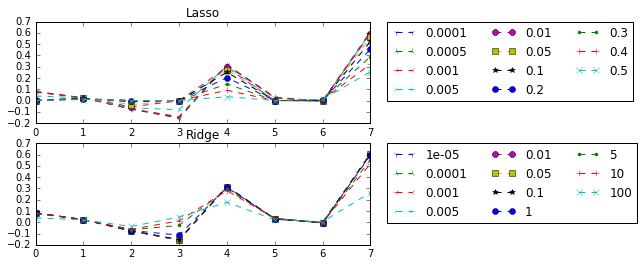

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


markers = ['1', '2', '3', '4', '8', 's', '*', 'o', '.', '+', 'x', 'D']

fig = plt.figure(1)
lplot = fig.add_subplot(211)
rplot = fig.add_subplot(212)
lplot.set_title("Lasso")
rplot.set_title("Ridge")

midx = 0
for l_alpha in lasso_alphas:
    lasso = Lasso(alpha=l_alpha)
    lasso.fit(prostate_cancer_tindep, prostate_cancer_tdep)
    l_coeff = lasso.coef_
    lplot.plot(l_coeff, linestyle='--', marker=markers[midx], label=str(l_alpha))
    midx += 1
    
midx = 0
for r_alpha in ridge_alphas:
    ridge = Ridge(alpha=r_alpha)
    ridge.fit(prostate_cancer_tindep, prostate_cancer_tdep)
    r_coeff = ridge.coef_[0]
    rplot.plot(r_coeff, linestyle='--', marker=markers[midx], label=str(r_alpha))
    midx += 1
    
lplot.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=3, borderaxespad=0.)
rplot.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=3, borderaxespad=0.)
plt.show(fig)

Based on the figure above, when the alpha value increase, the coefficients have less differences among them. In other words, coefficients vary less as alpha value increases. In addition, coefficient values remain relative same even if alpha value varied

3) Run least squares regression, ridge, and lasso on the full training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error on the test data for each.

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#best regularization parameter from part 1
lasso = Lasso(alpha=0.5)
lasso.fit(prostate_cancer_tindep, prostate_cancer_tdep)
ridge = Ridge(alpha=10)
ridge.fit(prostate_cancer_tindep, prostate_cancer_tdep)
linear = LinearRegression()
linear.fit(prostate_cancer_tindep, prostate_cancer_tdep)

#prediction error from test data
prostate_cancer_ttindep = prostate_cancer_test.drop(['lcavol'], axis=1)
prostate_cancer_ttdep = prostate_cancer_test[['lcavol']]

lasso_predicted = lasso.predict(prostate_cancer_ttindep)
ridge_predicted = ridge.predict(prostate_cancer_ttindep)
linear_predicted = linear.predict(prostate_cancer_ttindep)

model_actual = prostate_cancer_ttdep

lasso_mse = mean_squared_error(model_actual, lasso_predicted)
ridge_mse = mean_squared_error(model_actual, ridge_predicted)
linear_mse = mean_squared_error(model_actual, linear_predicted)

#print results
print("Lasso prediction error:", lasso_mse)
print("Ridge prediction error:", ridge_mse)
print("Linear prediction error:", linear_mse)
    

Lasso prediction error: 0.850865291255
Ridge prediction error: 0.544994235195
Linear prediction error: 0.543783938173


4) For the best lasso parameter, determine the variables that were not dropped. Using only these variables, run least squares regression on full training data and report the prediction error on the test data.

In [5]:
#best lasso paramater is 0.5 as obtained in part 1
lasso = Lasso(alpha=l_alpha)
lasso.fit(prostate_cancer_tindep, prostate_cancer_tdep)
l_coeff = lasso.coef_

#determine variables (utilize non zero coefficients)
idx = np.flatnonzero(l_coeff)
prostate_cancer_tindepcrt = prostate_cancer_tindep.ix[:,idx]
prostate_cancer_ttindepcrt = prostate_cancer_ttindep.ix[:,idx]

linear = LinearRegression()
linear.fit(prostate_cancer_tindepcrt, prostate_cancer_tdep)
linear_predicted = linear.predict(prostate_cancer_ttindepcrt)
linear_mse = mean_squared_error(model_actual, linear_predicted)
print("Linear prediction error with selective variables:", linear_mse)

Linear prediction error with selective variables: 0.566328775677


## Question 3 (3+3+2+2 = 10 points)

Re-solve all the questions in question 2 using R. You can submit the code and results via a PDF or other format. Just please make a reference to it in your notebook. See hints.R on the Canvas homework 3 page to help get you started. I would recommend using [RStudio](https://www.rstudio.com/products/rstudio/download/) for your work in R.

There is an attached file for this section titled HW3Q3DATAMINING.r
Please run the r code in the r studio with correct path to the csv file. 
If the plot is not coming out correctly, please refer to the HW3Q3P2Plot.png

## Question 4 (5+5 = 10 points)

1. Derive the coefficent updates, from first principles, for a gradient descent version of linear regression. Hint: start from the cost function. If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for a gradient descent version of linear regression. Should be similar to sklearn in that you have a fit function that takes an X, y, learning rate, and number of iterations and a predict funtion that takes an X value. Use your new SGD regression to re-run question 2.4 and compare MSE. Make sure you always normalize your X matrices and use an intercept. You can also compare your results with SGDRegressor from sklearn, but not required.

1. Derivation is attached as derivation.jpg.

In [12]:
import numpy as np
import pandas as pd
import random
import pylab
from scipy import stats
from __future__ import division

class GradientDescent:
    def __init__(self):
        self.theta = None

    def predict(self, X):
        # add bias term to input data
        bias = np.ones(shape=(X.shape[0],1))
        X_with_bias = np.concatenate((bias, X), axis=1)
        return np.dot(X_with_bias, self.theta)
        
    def fit(self, x, y, alpha, num_iter):
        # number of samples
        m = x.shape[0]
        
        # add bias term to input data
        bias = np.ones(shape=(x.shape[0],1))
        x = np.concatenate((bias, x), axis=1)
        
        # initialize thetas
        theta = np.ones(x.shape[1])

        #iterate
        for i in xrange(num_iter):
            hypothesis = np.dot(x, theta)
            loss = hypothesis - y
            gradient = np.dot(x.transpose(), loss) / m
            # update
            theta = theta - alpha * gradient

        self.theta = theta
        return theta

In [13]:
import sklearn
from sklearn import linear_model, metrics, cross_validation

prostate = pd.read_csv("prostate.csv")
train, test = cross_validation.train_test_split(prostate, test_size=.33, random_state=42)
selected_vars = ['age', 'lcp', 'pgg45', 'lpsa']
dep_vars = ["lcavol"]
test_reshaped = np.squeeze(test[dep_vars])
train_reshaped = np.squeeze(train[dep_vars])

gd = GradientDescent()
gd.fit(train[selected_vars], train_reshaped, alpha = 0.0001, num_iter=100000)
gd_MSE = metrics.mean_squared_error(gd.predict(test[selected_vars]), test_reshaped)
print "Gradient descent MSE: ", gd_MSE

Gradient descent MSE:  0.583602464313


The MSE from my gradient descent linear regression on the data from question 2.4 is 0.583602464313, which is close to and slightly larger than that of the normal linear regression using the selected variables, .566328775677.

## Question 5 (2+1+5+2 = 10 points)

We will use Google's Tensorflow to create a simple multi-layered perceptron. Installation instructions can be found [here](https://www.tensorflow.org/versions/r0.7/get_started/os_setup.html#pip-installation). To make our lives even easier, we will be using [skflow](https://github.com/tensorflow/skflow). This can be installed via pip install skflow. This is a higher level API on top of tensorflow. You can find documentation on how to get started on the skflow page.

To install tensorflow, this command should work (did on Mac):

sudo pip install --upgrade https://storage.googleapis.com/tensorflow/mac/tensorflow-0.7.0-py2-none-any.whl --ignore-installed

1. Use pandas to get spam classification [data](https://archive.ics.uci.edu/ml/datasets/Spambase) from UCI. Don't worry about getting the column names. The last column is a 1 if spam, zero otherwise.
2. Split the data into training and testing using test_size=0.33, random_state=42.
3. Use a TensorFlowDNNClassifier to classify whether an email is spam and report your testing accuracy. You should use 1 hidden layer with 5 units, 50,000 steps, and a learning rate of .05. What does each parameter do and why does it matter?
4. Compare your accuracy to a logistic regression using sklean. Discuss why one may have performed better than the other. You may also experiment with the architecture of your neural network (i.e. the number of hidden units, the number of nodes, the number of steps, and the learning rate) to see if you can improve your results from part 3.

In [2]:
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn import datasets, cross_validation, metrics, linear_model
import tensorflow as tf

import skflow

#part 1
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)
x = data.values[:,:57]
y = data.values[:,57]

#part 2
train_x, test_x, train_y, test_y = cross_validation.train_test_split(x,y,test_size=0.33, random_state=42)

#part 3
classifier = skflow.TensorFlowDNNClassifier( hidden_units=[5,1], steps=50000, learning_rate=0.05, n_classes = 2)
classifier.fit(train_x, train_y)
result = classifier.predict(test_x)
print ("Accuracy: " + str(metrics.accuracy_score(test_y,result)) + "\n\n")
#print train_y

Step #1, avg. loss: 1.44190
Step #5001, epoch #51, avg. loss: 0.66795
Step #10001, epoch #103, avg. loss: 0.66545
Step #15001, epoch #154, avg. loss: 0.66546
Step #20001, epoch #206, avg. loss: 0.66537
Step #25001, epoch #257, avg. loss: 0.66550
Step #30001, epoch #309, avg. loss: 0.66555
Step #35001, epoch #360, avg. loss: 0.66523
Step #40001, epoch #412, avg. loss: 0.66527
Step #45001, epoch #463, avg. loss: 0.66511
Accuracy: 0.583278472679




In [3]:
reg = linear_model.LogisticRegression()
reg.fit(train_x, train_y)
result = reg.predict(test_x)
print "Regression accuracy: "+str(metrics.accuracy_score(test_y,result))

Regression accuracy: 0.930875576037


## Question 6 (2+2+3 = 7 points)

1. State briefly what you understand by the bias-variance tradeoff.

2. For a given model and problem, what happens to these two quantities when the amount of training data available decreases, keeping all other factors remaining the same ( e.g. if 5-fold CV was used to train the original model, the same is used for the smaller dataset)?

3. Suppose you want to approximate the pdf of a continuous random variable $X$, that takes on values over the interval (a,b), as follows: Get $N$ i.i.d samples of $X$; bin the interval into $k$ equi-spaced bins, and construct a histogram, which you then normalize so that total area under the histogram is 1. This normalized histogram will be an approximation of the true pdf. Clearly the histogram will change if you repeat this experiment using another $N$ samples; hence you can consider the quality of the solution in term of the 'mean' histogram (bias) and the variations among the histograms (variance).  Qualitatively explain how you would expect the bias-variance tradeoff to be reflected in this situation, as a function of $k$.

1. As model complexity increases, bias decreases and variance increases. This means that simpler/regularized models will be more stable with respect to variations in data, but will have more error on average; more complex/overfitted models will have lower average error and more sensitivity to variations in the data. The sweet spot is somewhere in between and can be achieved by tuning the amount of training data, type of model, and number of parameters.

2. Variance increases; bias remains the same.

3. With small k, the 'mean' histogram will be a rough approximation of the true pdf, i.e. high bias (pictorally: it is difficult to fill the area under a smooth curve with only 2 or 3 large rectangles), but there will be little variation among different data sets, as there are fewer bins for the samples to fall into. With large k, the 'mean' histogram will be a smoother/more accurate approximation of the true pdf, i.e. low bias, but will vary greatly among different data sets as the bins contain more precise intervals and may vary between having 0 and 1 samples, etc.